# Объединенные 1, 3 и 4 задания на реальном датасете
___
## Задание:
1. **Загрузить** реальный датасет
2. **Проанализировать** данные, найти **выбросы**, **пустые значения**. 
3. **Заполнить пустые** числовые значения подходящими, используя группировку по другим столбцам. 
4. Рассчитать **корреляцию** для числовых столбцов, вывести **два столбца**, у которых наибольшая положительная корреляция. 
5. Все обложить различными **графиками** и **визуализациями**.

___
### Загружаем данные
В качестве датасета я возьму датасет Титаника с Kaggle.

In [1]:
# Подключаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('input.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
### Анализируем данные
#### Предварительный анализ
Узнаем, какие зачения в нашем датасете, и сколько пустых.

In [3]:
nan_values = df.isnull().sum()
display(nan_values)
display(df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

**Вывод:** 
- Таблица состоит из 12 столбцов и 891 строк. Из них 7 столбцов являются числовыми и 5 строковыми.
- Пропущенные значения присутствуют в столбцах Age: 177, Cabin: 687, Embarked: 2


Из источника, откуда были взяты данные, узнаем значение каждого из столбцов:
| Столбец     | Описание                                                 | Комментарий                                                                                                                         |
|-------------|----------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| PassengerId | Номер пассажира                                          |                                                                                                                                     |
| Survived    | Выживаемость                                             | 0 = Не выжил, 1 = Выжил                                                                                                             |
| Pclass      | Класс билета                                             | Позволяет определить социально-экономический статус. <br/> 1 = Upper (высший), 2 = Middle (средний), 3rd = Lower (нижний)           |
| Name        | Имя                                                      |                                                                                                                                     |
| Sex         | Пол                                                      |                                                                                                                                     |
| Age         | Возраст в годах                                          | Возраст дробный, если он меньше 1. <br/>Если возраст предположительный, то он предоставлен в виде xx.5                              |
| Sibsp       | Количество братьев и сестер / супругов на борту Титаника | Sibling = брат, сестра, сводный брат, сводная сестра. <br/>Spouse = муж, жена (любовницы и женихи игнорировались)                   |
| Parch       | Количество родителей/детей на борту Титаника             | Parent = мать, отец. <br/>Child = дочь, сын, падчерица, пасынок. <br/>Некоторые дети путешествовали только с няней, для них parch=0 |
| Ticket      | Номер билета                                             |                                                                                                                                     |
| Fare        | Тариф (стоимость билета?)                                |                                                                                                                                     |
| Cabin       | Номер каюты                                              |                                                                                                                                     |
| Embarked    | Порт отправления                                         | C = Cherbourg, Q = Queenstown, S = Southampton                                                                                      |

**Предварительное предположение** по данным, хранящимся в каждом из столбцов, исходя из их описания и типа данных:
- Столбец `PassengerId` - целочисленный столбец с порядковыми данными (последовательные номера от 1 до 891 соответственно)
- Столбцы `Name`, `Ticket`, `Cabin` имеют различные строковые значения, которые не являются категориальными.
- Столбцы `Sex`, `Embarked` - категориальные строковые значения, принимающие одно из нескольких указанных значений
- Столбцы `Survived`, `Pclass`, `SibSp`, `Parch`, `Fare` - категориальные дискретные численные значения
- Столбец `Age` - числовой, возможно непрерывный, принимающий значения в определенном диапазоне

Проверим эти выводы, проанализировав датасет глубже.

#### Визуализация данных
Выберем столбцы с численными значениями, чтобы провести анализ над ними

In [4]:
numeric_cols = df.select_dtypes('number').columns
display(numeric_cols)
display(df.describe())  # Анализирует именно численные значения

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Визуализируем данные с помощью гистограмм и "ящика с усами"

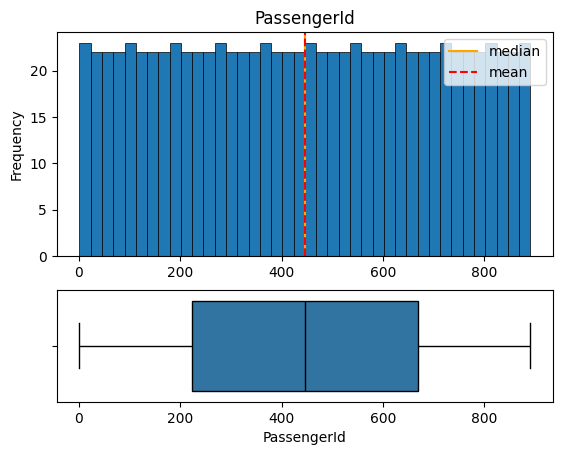

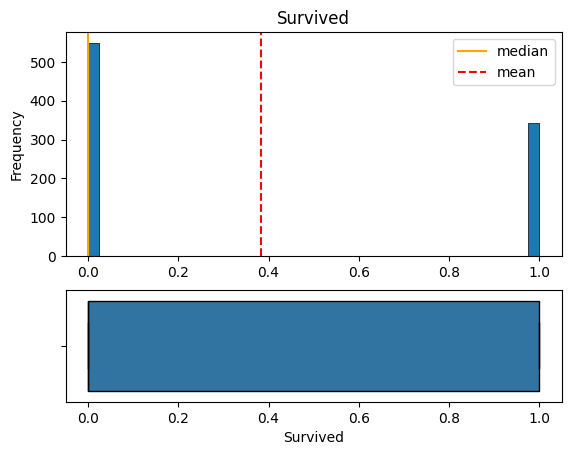

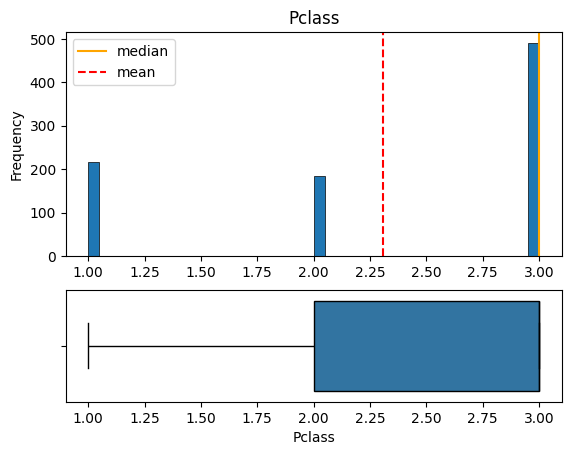

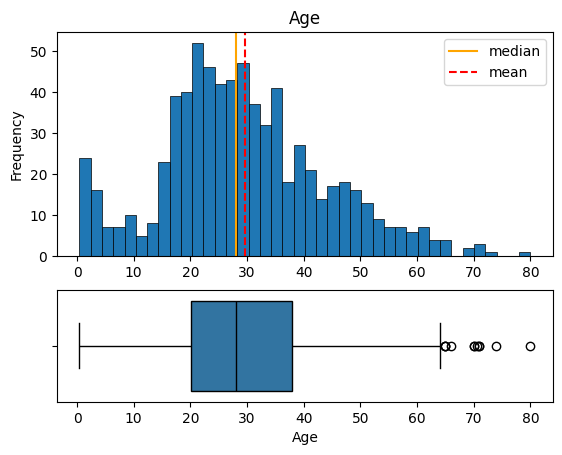

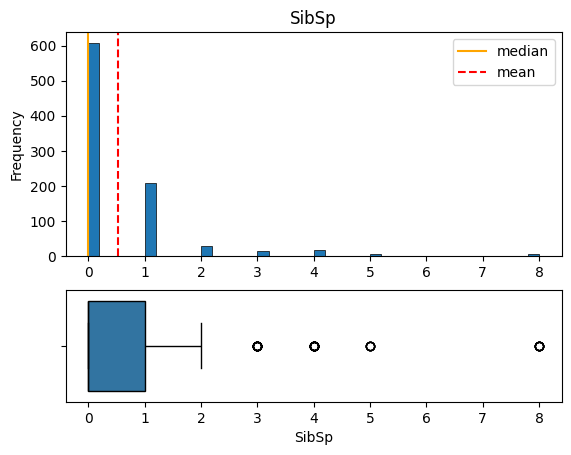

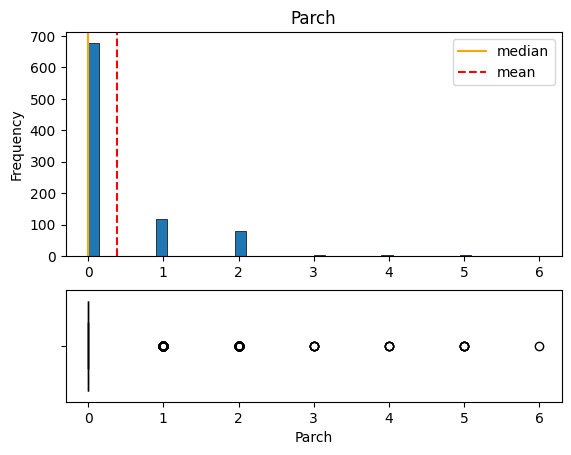

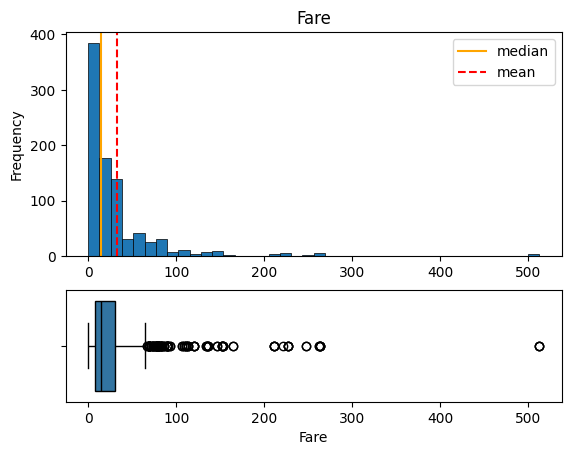

In [93]:
for col in numeric_cols:
    fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})  # поле для двух графиков
    hist = df[col].plot(kind='hist', bins=40, edgecolor='k', linewidth=0.5, title=col, ax=axes[0])  # гистограмма
    median_line = hist.axvline(df[col].median(), color='orange', label='median')  # линия медианы на гистограмме
    mean_line = hist.axvline(df[col].mean(), color='r', label='mean', linestyle='dashed')  # линия среднего на гистограмме
    hist.legend(handles=[median_line, mean_line])  # легенда на гистограмме
    box_plt = sns.boxplot(df[col], orient='h', linecolor='k', ax=axes[1])  # ящик с усами
    # box_plt = df[col].plot(kind='box', vert=False, ax=axes[1])  # два других способа нарисовать ящик с усами
    # box_plt = plt.boxplot(df[col], vert=False, widths=[0.9])
    plt.show()

**Выводы:**

Тип данных:
- Предположения о столбцах `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch`, `Age` оказались верны. 
- Однако столбец `Fare` оказался не категориальным дискретным, а непрерывным числовым.

Принимаемые значения:
- `PassengerId` (номер пассажира) - принимает последовательные значения от 1 до 891 (как и предполагалось).
- `Survived` (выживаемость) - принимает значения 0 и 1 (как и предполагалось). Из них значений 0 больше (~550), а 1 меньше (~350)
- `Pclass` (класс билета) - принимает значения 1, 2 и 3 (как и предполагалось). Из них значений 3 больше всего (~500), а значений 1 и 2 примерно поровну (~200 каждый)
- `Age` (возраст) - принимает значения от 0 до 80. Это бимодальное распределение с небольшим пиком в возрасте 0 и основной модой около 20. Медианное и среднее значение смещены ближе к 30 (median = 28, mean = 29.7). В среднем значения сконцентрированы в районе 20-40 лет (первый и третий квартиль), межквартильный размах захватывает возраст примерно от 0 до 65. После 65 идут выбросы.
- `SibSp` (количество братьев с сестрами или супруг) - принимает дискретные целочисленные значения от 0 до 8. При этом большая часть значений (около 600) - это 0, на втором месте 1 (~200 значений) и изредка 2 (<50), а остальные значения являются выбросами.
- `Parch` (количество родителей/детей) - принимает дискретные целочисленные значения от 0 до 6. При этом значительное большинство значений равы 0 (~700). Остальные значения являются выбросами.
- `Fare` (тариф билета) - принимает значения от 0 до 500 (если точнее, то 512.329200). Медиана = 14.454200, среднее = 32.204208. Значения приблизительно после 60 являются выбросами.

    Форма распределения похожа на экспоненту, однако также можно заметить несколько групп значений (от 0 до 15, от 15 до 30, от 30 до 90, от 90 до 170, от 200 до 300 и один выброс на 500). Эти группы, вероятно, коррелируют со значениями других столбцов, например, с классом билета (Pclass) или с размером семьи (SibSp и Parch). Эту гипотезу можно будет проверить дальше при вычислении корреляций.

#### Анализ строковых значений
Проанализируем значения, которые находятся в строковых столбцах.

In [100]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Мы также можем построить гистограммы для некоторых категориальных значений, которые не являются численными

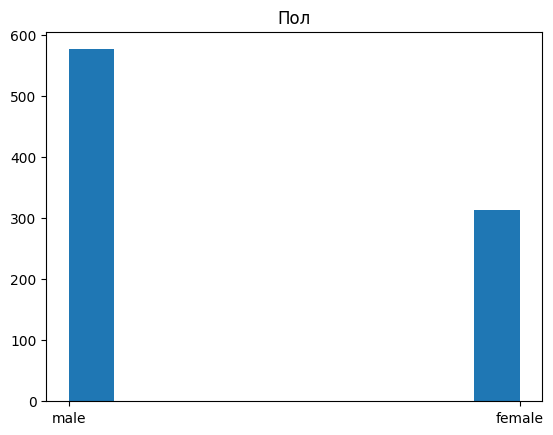

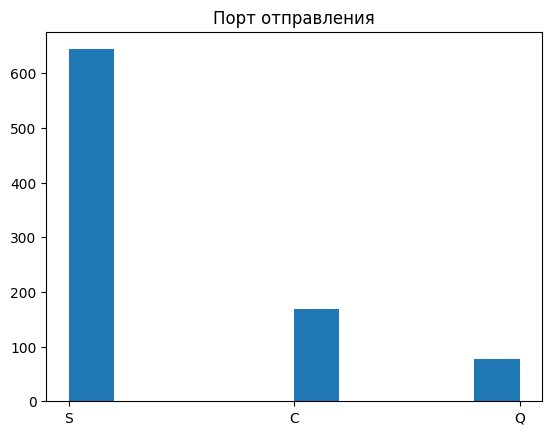

In [ ]:
df['Sex'].hist(grid=0)
plt.title('Пол')
plt.show()
df['Embarked'].hist(grid=0)
plt.title('Порт отправления')
plt.show()
plt.box

**Выводы:**
- Мужчин больше, чем женщин почти в 2 раза.
- Самый популярный порт отправления среди пассажиров - 'S' (т.е. Southampton), из него отправилось более 600 человек. На втором месте 'C' (Cherbourg), чуть менее 200 человек. На третьем - 'Q' (Queenstown) - чуть менее 100.

_________
### Очистка данных
#### Заполнение пустых значений
Сначала посмотрим на отсутствующие значения.

In [48]:
display(nan_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Age` - важный для нас числовой столбец, его заполнить обязательно для дальнейшей работы с данными. `Cabin` и `Embarked` - строковые столбцы. В них nan можно либо отбросить, либо заполнить строковыми значениями-заглушками, например 'Unknown'.

**Заполним столбец `Age`** медианным значением, сгруппировав по полу.

In [94]:
# Делаем копию нашего датафрейма
df_copy = df.copy()

# Заполняем пустые значения медианой
df_copy['Age'] = df_copy['Age'].fillna(df_copy.groupby('Sex')['Age'].transform('median'))

display(df.Age.describe())  # До заполнения пустых значений
display(df_copy.Age.describe())  # После заполнения

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Сравним, как изменилось распределение после заполнения пустых значений

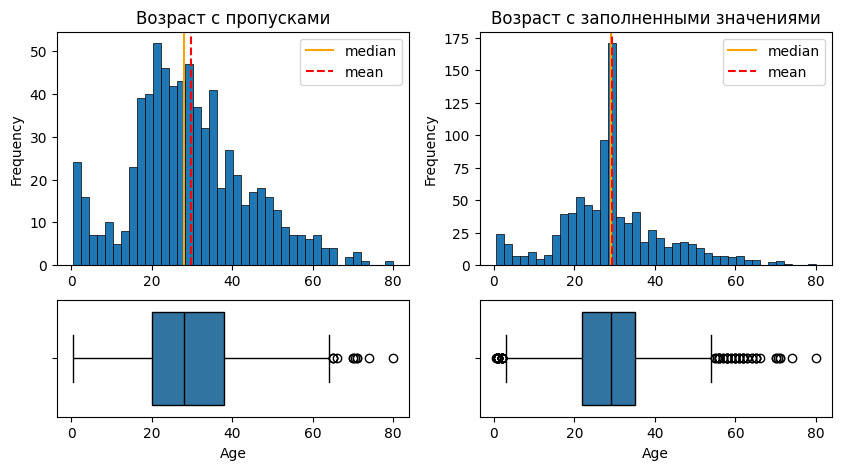

In [ ]:
def draw_graph(data: pd.DataFrame, title, ax_hist, ax_box):
    # Гистограмма
    data.plot(kind='hist', bins=40, edgecolor='k', linewidth=0.5, title=title, ax=ax_hist) # гистограмма
    median_line = ax_hist.axvline(data.median(), color='orange', label='median')  # линия медианы на гистограмме
    mean_line = ax_hist.axvline(data.mean(), color='r', label='mean', linestyle='dashed')  # линия среднего на гистограмме
    ax_hist.legend(handles=[median_line, mean_line])  # легенда на гистограмме

    sns.boxplot(data, orient='h', linecolor='k', ax=ax_box)  # ящик с усами
    return hist, box_plt

fig, axes = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'height_ratios': [2, 1]})  # поле для графиков
draw_graph(df['Age'], 'Возраст с пропусками', axes[0, 0], axes[1, 0])
draw_graph(df_copy['Age'], 'Возраст с заполненными значениями', axes[0, 1], axes[1, 1])
plt.show()

**Вывод:** Т.к. пропущенных значений было много и мы все их заменили на медиану (28), то их количество значительно возросло. Это повлияло на межквартильный размах и выбросы, теперь выбросами считаются некоторые значения в районе 0 лет и >55. Наиболее распространенные значения, среднее и медиана при этом не сильно изменились.

**Заполним пустые значения в строковых столбцах** `Cabin` и `Embarked`. Будем использовать заглушку 'Unknown'

In [99]:
df_copy.Cabin = df_copy.Cabin.fillna('Unknown')
df_copy.Embarked = df_copy.Embarked.fillna('Unknown')

df_copy.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,4
top,"Dooley, Mr. Patrick",male,347082,Unknown,S
freq,1,577,7,687,644


#### Нахождение выбросов
Мы увидели выбросы на некоторых графиках. Вытащим их в виде списков.

**Выбросы** определяются как значения, которые находятся ниже `Q1 - 1.5 * IQR` или выше `Q3 + 1.5 * IQR`, где `Q1` и `Q3` - первый и третий квартиль, `IQR` = `Q3 - Q1` — **межквартильный размах**. 

Границы межквартильного размаха:
PassengerId	-444.0	1336.0
Survived	-1.5	2.5
Pclass	0.5	4.5
Age	2.5	54.5
SibSp	-1.5	2.5
Parch	0.0	0.0
Fare	-26.724	65.6344

Выбросы:


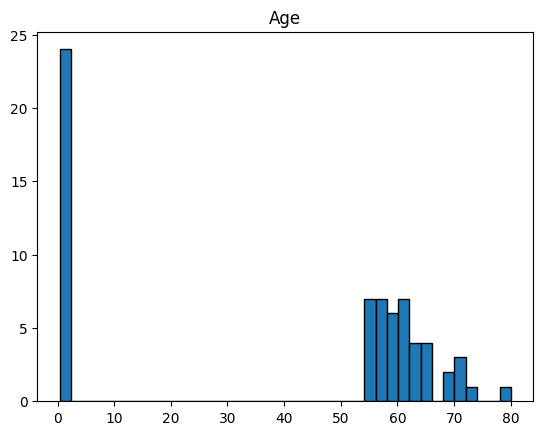

Количество элементов: 891, количество выбросов: 66
Процент выбросов, относительно всего количества: 7.41%


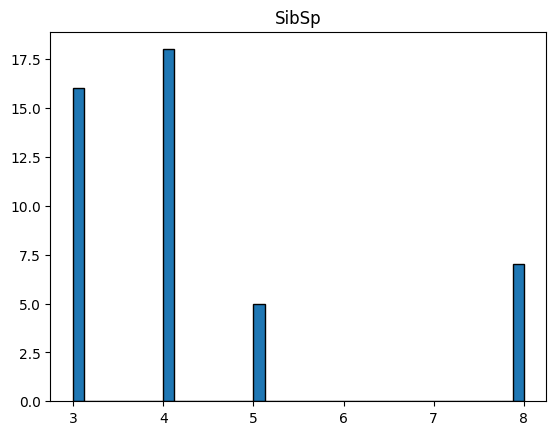

Количество элементов: 891, количество выбросов: 46
Процент выбросов, относительно всего количества: 5.16%


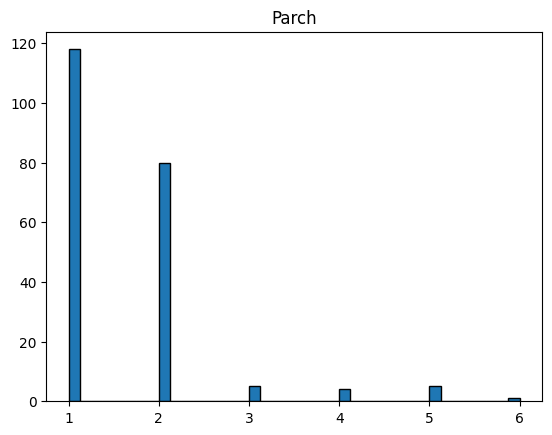

Количество элементов: 891, количество выбросов: 213
Процент выбросов, относительно всего количества: 23.91%


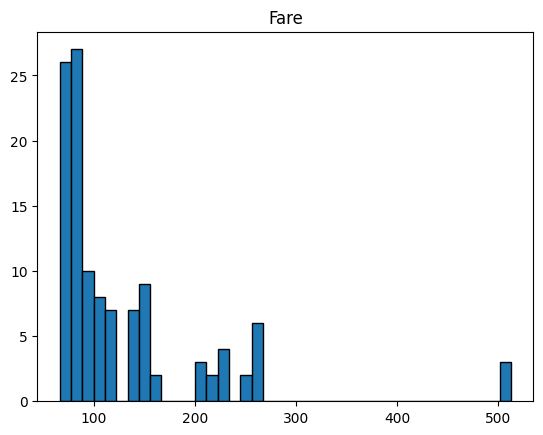

Количество элементов: 891, количество выбросов: 116
Процент выбросов, относительно всего количества: 13.02%


In [145]:
print('Границы межквартильного размаха:')
outliers = {}
for col in numeric_cols:
    q1 = np.quantile(df_copy[col], 0.25)  # первый квартиль
    q3 = np.quantile(df_copy[col], 0.75)  # третий квартиль
    iqr = q3 - q1  # межквартильный размах

    # Границы 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(col, lower_bound, upper_bound, sep='\t')

    # Выбросы
    col_outliers = df_copy[col][(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    if not col_outliers.empty:
        outliers[col] = col_outliers
    
print('\nВыбросы:')
for key in outliers:
    # Визуализируем на графике
    plt.hist(outliers[key], bins=40, edgecolor='k')
    plt.title(key)
    plt.show()
    
    print(f'Количество элементов: {df_copy[key].count()}, количество выбросов: {outliers[key].count()}')
    print(f'Процент выбросов, относительно всего количества: {(outliers[key].count() / df_copy[key].count()  * 100):.2f}%')



Мы могли бы удалить эти выбросы из выборки, но я этого делать не буду, т.к. их наличие связано не с ошибками в данных, а с их особенностями. Тем более мне кажется, они будут важны для дальнейшей работы с данными.

### Работа с данными
#### Нахождение корреляций
Рассчитаем матрицу **корреляций** для числовых столбцов. Используем для этого метод расчета корреляции Пирсона.

In [147]:
corr_mat = df_copy[numeric_cols].corr()
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


Визуализируем эту матрицу с помощью тепловой карты

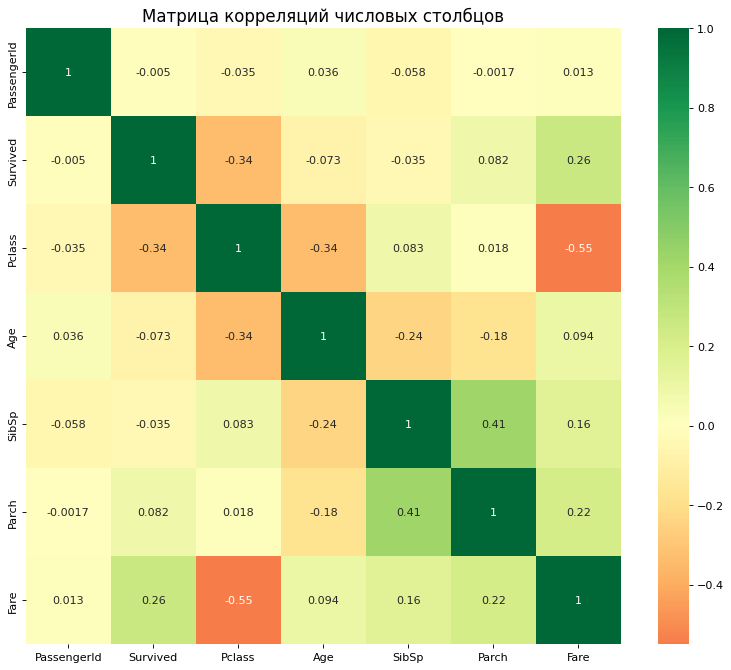

In [155]:
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляций числовых столбцов', fontsize=15)
plt.show()

Из этого графика можно увидеть, что максимальная отрицательная корреляция будет у столбцов `Fare` с `Pclass` (тариф и класс билета) = **-0.55** и положительная у `Parch` с `SibSp` (количество родителей/детей и супругов/братьев-сестер) = **0.41**. 

По шкале Чеддока мы можем оценить величину наших корреляций:  
слабая — от 0,1 до 0,3;  
умеренная — от 0,3 до 0,5;  
заметная — от 0,5 до 0,7;   
высокая — от 0,7 до 0,9;  
весьма высокая (сильная) — от 0,9 до 1,0.   

Соответственно, мы наблюдаем:  
**заметную** корреляцию у столбцов `Fare` с `Pclass`,  
**умеренную** у столбцов `Parch` с `SibSp`; `Survived` с `Pclass`; `Age` с `Pclass`,  
**слабую** у столбцов `Fare` с `Survived`; `Fare` с `SibSp`; `Fare` с `Parch`; `SibSp` с `Age`; `Parch` с `Age`  
и **практически отсутствующую** у всех остальных пар.